# **Fatalities in Israel-Palestines War Analysis (2000 - 2023)**

### Dự án phân tích thống kê số liệu thiệt hại về người trong cuộc chiến Israel - Palestine

*Language used: English*

*Author: Hoang Anh Tuan*

*Type: Data Analysis*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

## **Data Import and Initial View**

In [2]:
# Importing Data
link = 'https://drive.google.com/file/d/10dTCm4mVK5ZLI8H2aIleiPJVXsUDqluz/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
war_df = pd.read_csv(path)

In [3]:
war_df

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,9/24/2023,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,9/24/2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,9/24/2023,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,9/24/2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,9/22/2023,16.0,Palestinian,Kfar Dan,Jenin,West Bank,9/22/2023,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,9/20/2023,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,9/20/2023,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,9/19/2023,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,9/19/2023,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,10/19/2000,64.0,Israeli,Nablus,Nablus,West Bank,10/19/2000,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,10/17/2000,28.0,Palestinian,Beit Furik,Nablus,West Bank,10/17/2000,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,10/7/2000,36.0,Israeli,Nablus,Nablus,West Bank,10/7/2000,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,10/7/2000,21.0,Palestinian,Bidya,Salfit,West Bank,10/7/2000,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


**There are 16 columns and 11124 rows. Each column is a unique feature. Each row/record is an individual who got killed during the war time**

## **Data Cleaning**

In [4]:
# See dataset information
war_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [5]:
# Statistic description
war_df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [6]:
# Check unique values for all columns

for column in war_df.columns:
    unique_values = war_df[column].unique()
    null_count = war_df[column].isnull().sum()

    # Kiểm tra số lượng giá trị duy nhất
    if len(unique_values) > 10:
        unique_values = list(unique_values[:5]) + [f"+{len(unique_values) - 5}"]

    print(f"Unique value counts for '{column}' is: {unique_values}")
    print(f"Number of missing values for '{column}' is: {null_count}")

    # Case: if there are only 2 unique in column
    if 0 in unique_values and 1 in unique_values and len(unique_values) < 6:
      print("This column has 2 unique values, which is very likely to be in binary form.")

    # Case: 1 unique = useless
    if len(unique_values) == 1:
      print("Only 1 unique found, must be eliminated.")

    print("-" * 30)

Unique value counts for 'name' is: ["'Abd a-Rahman Suleiman Muhammad Abu Daghash", "Usayed Farhan Muhammad 'Ali Abu 'Ali", "'Abdallah 'Imad Sa'ed Abu Hassan", 'Durgham Muhammad Yihya al-Akhras', "Raafat 'Omar Ahmad Khamaisah", '+11078']
Number of missing values for 'name' is: 0
------------------------------
Unique value counts for 'date_of_event' is: ['9/24/2023', '9/22/2023', '9/20/2023', '9/19/2023', '9/9/2023', '+2400']
Number of missing values for 'date_of_event' is: 0
------------------------------
Unique value counts for 'age' is: [32.0, 21.0, 16.0, 19.0, 15.0, '+91']
Number of missing values for 'age' is: 129
------------------------------
Unique value counts for 'citizenship' is: ['Palestinian' 'Israeli' 'Jordanian' 'American']
Number of missing values for 'citizenship' is: 0
------------------------------
Unique value counts for 'event_location' is: ['Nur Shams R.C.', 'Kfar Dan', "'Aqbat Jaber R.C.", 'Jenin R.C.', 'Gaza City', '+489']
Number of missing values for 'event_locat

**Columns that have missing values: age, gender, took_part_in_the_hostilities, place_of_residence, place_of_residence_district, type_of_injury, notes**

These missing values might due to the complexity of the data and the way data was collected.

**Columns that are class-type: citizenship, gender, took_part_in_the_hostilities, killed_by**

In [7]:
# A closer look of missing values
war_df.isna().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [8]:
# Fill the missing age with the mean of the column
avg_age = war_df['age'].mean().round(0)
war_df['age'] = war_df['age'].fillna(avg_age)
war_df['age'] = war_df['age'].astype(int)

##**Data Visualization**

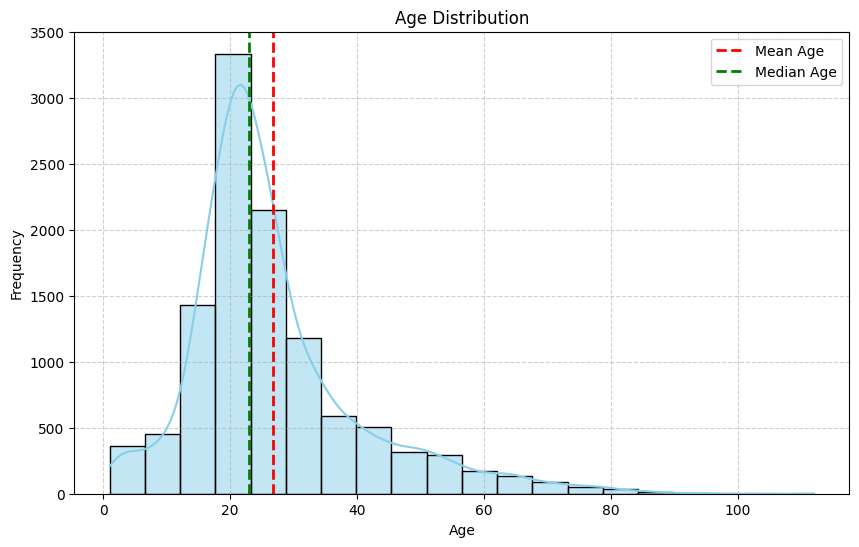

In [9]:
# Histogram for the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(war_df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(war_df['age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(war_df['age'].median(), color='green', linestyle='dashed', linewidth=2, label='Median Age')
plt.legend()
plt.show()

**The most common age for fatalities is 20, then dropped as it moves further this age group**

<Figure size 800x600 with 0 Axes>

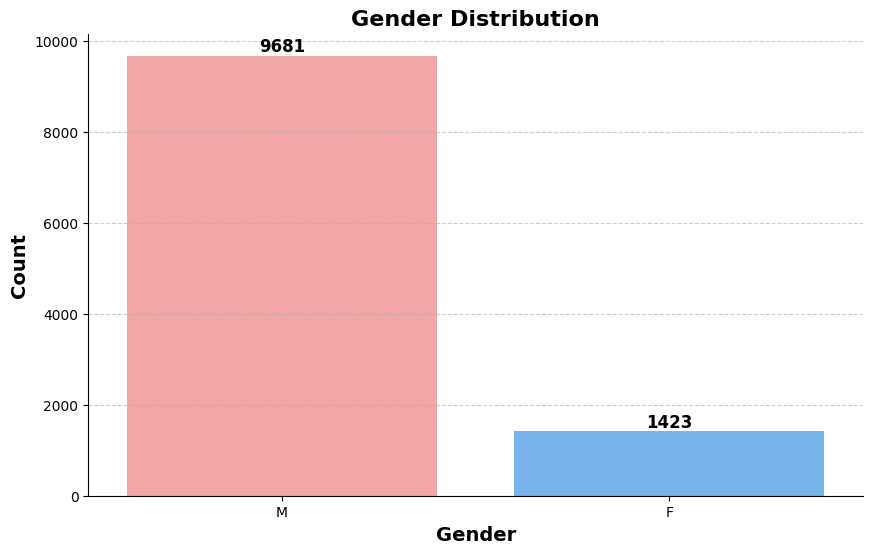

In [11]:
# Bar plot for 'gender'
gender_counts = war_df['gender'].value_counts()
plt.figure(figsize=(8, 6))
# Define a custom color palette
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)

# Add labels to the bars
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Remove the top and right spines of the plot
sns.despine()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

**Most of fatalities are Male (> 80%), the remaining are Female**

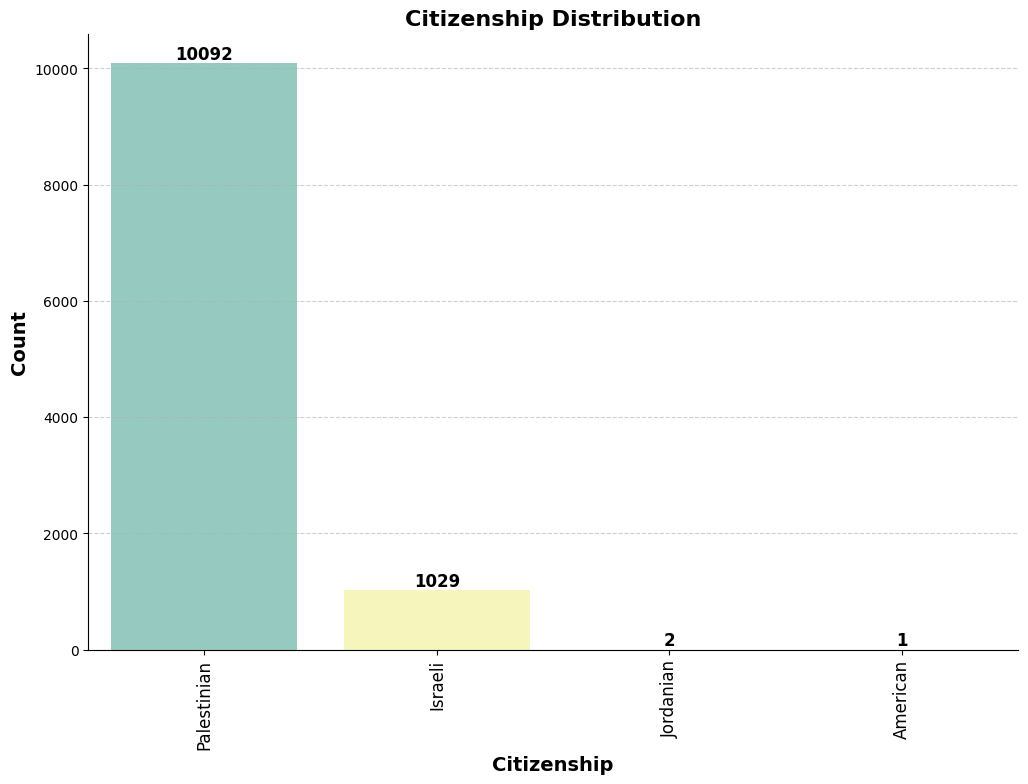

In [13]:
# Bar plot for 'citizenship'
citizenship_counts = war_df['citizenship'].value_counts()
# Define a custom color palette
colors = sns.color_palette("Set3")

plt.figure(figsize=(12, 8))  # Adjusted figure size to accommodate long x-axis labels
# Create the bar plot
ax = sns.barplot(x=citizenship_counts.index, y=citizenship_counts.values, palette=colors)

# Add labels to the bars
for i, count in enumerate(citizenship_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Citizenship Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Citizenship', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)  # Rotate and adjust x-axis labels

# Remove the top and right spines of the plot
sns.despine()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

**Most fatalities are Palestinian, few of them are Israeli, while there are very little proportion of Jordanian and American, but not noticable**

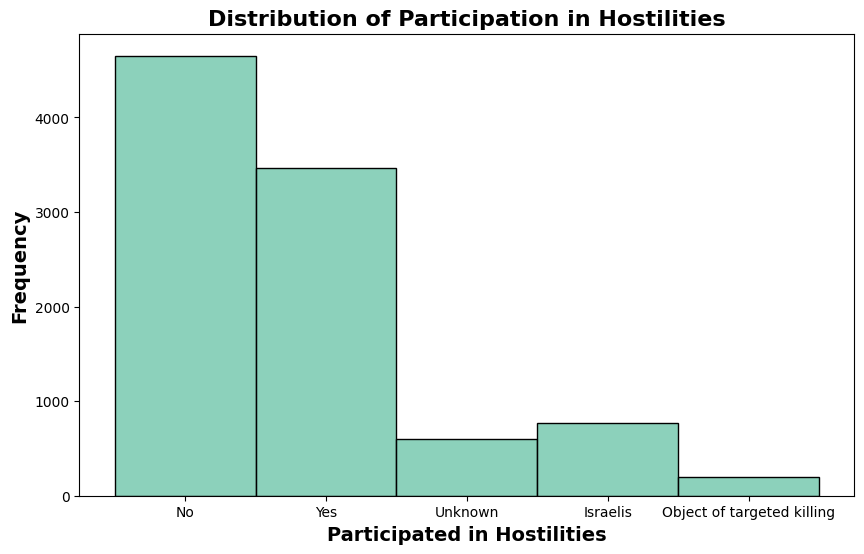

In [14]:
# Histogram for the 'took_part_in_the_hostilities' column
# Define a custom color palette
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(10, 6))
# Create the histogram
sns.histplot(war_df['took_part_in_the_hostilities'], bins=40, kde=False, color=colors[0])

plt.title('Distribution of Participation in Hostilities', fontsize=16, fontweight='bold')
plt.xlabel('Participated in Hostilities', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Customize the plot style
sns.set_style("whitegrid")

plt.show()

**Most fatalities individuals do not take part in the hostilities**

##**Time Series Analysis**

In [26]:
# Time Series Analysis
# Converting date columns to datetime
war_df['date_of_event'] = pd.to_datetime(war_df['date_of_event'])
war_df['date_of_death'] = pd.to_datetime(war_df['date_of_death'])

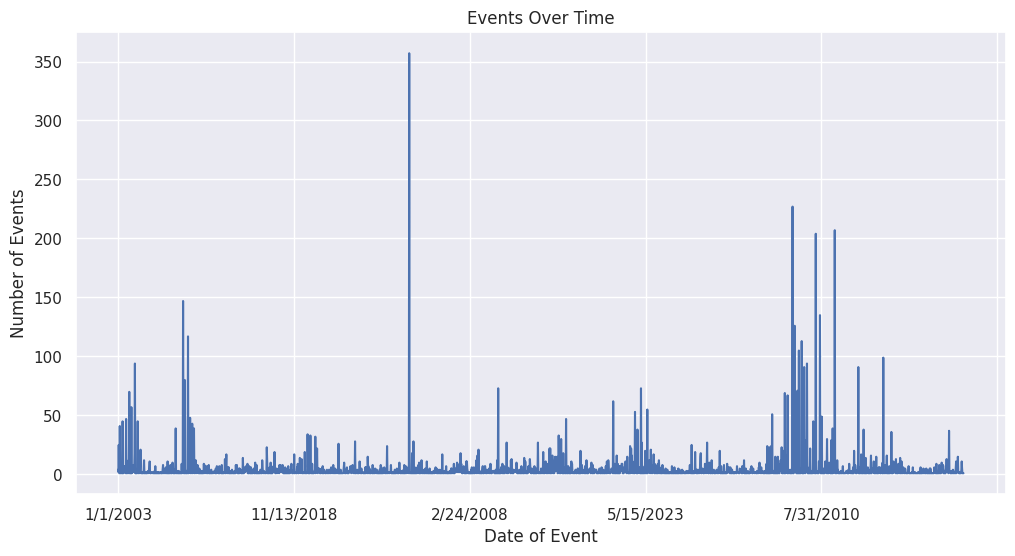

In [16]:
# Calculating the number of events per day
events_per_day = war_df.groupby('date_of_event').size()

plt.figure(figsize=(12, 6))
events_per_day.plot()
plt.title('Events Over Time')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.show()

**War activities have always been going, and risen to its peak at the year 2009 with more than 350 events on this single year**

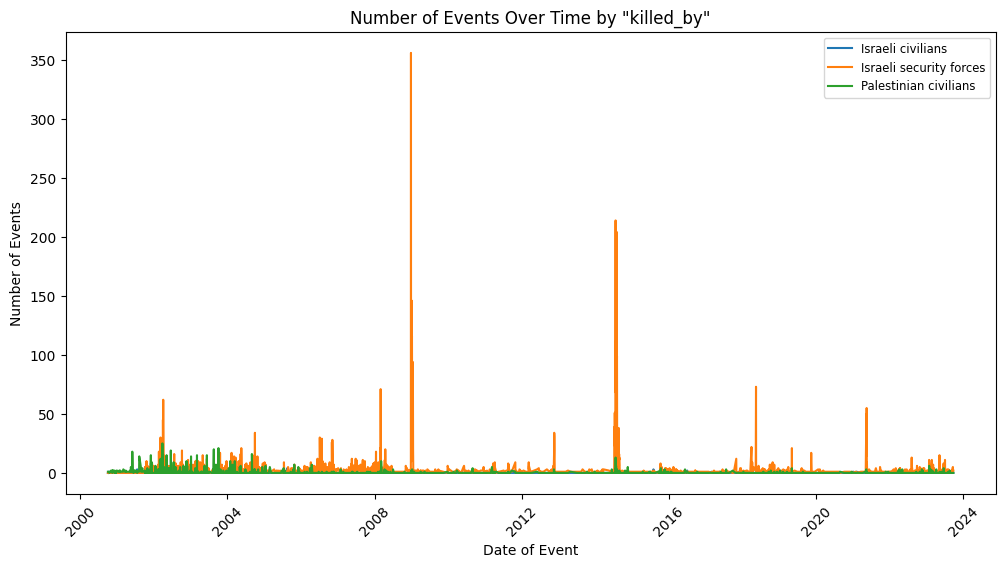

In [30]:
# Grouping the 'date_of_event' and 'killed_by' column and calculating
#the count of events for each combination

events_by_killed_by = war_df.groupby(['date_of_event', 'killed_by']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for column in events_by_killed_by.columns:
    plt.plot(events_by_killed_by.index, events_by_killed_by[column], label=column)

plt.title('Number of Events Over Time by "killed_by"')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.show()

**The Israeli security force is dominated on the warzone while we can see most of actions came from this unit, while only a small part contributed by Palestinian civillians**

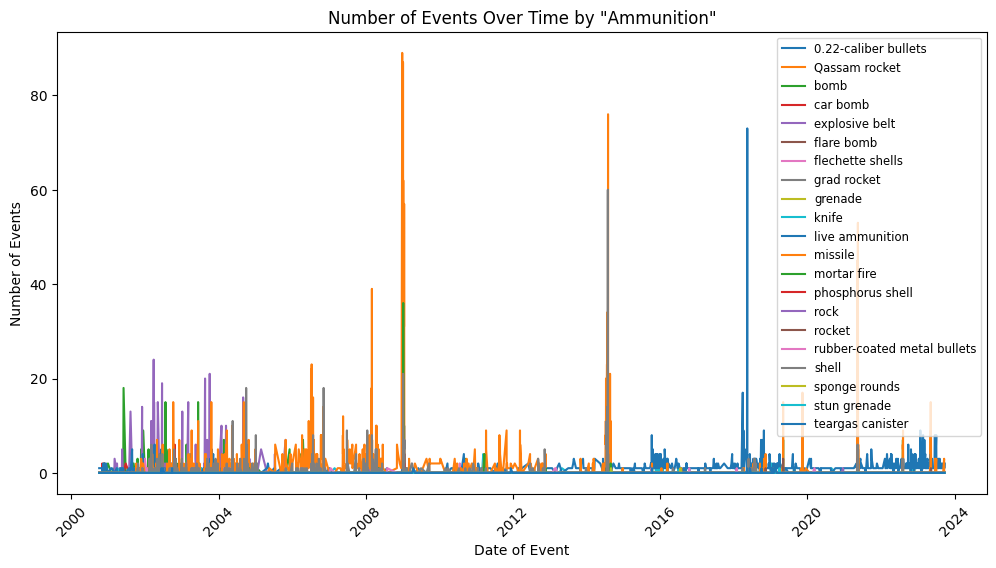

In [31]:
# Grouping the 'date_of_event' and 'ammunition' columns and calculating
# the count of events for each combination

events_by_ammunition = war_df.groupby(['date_of_event', 'ammunition']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for column in events_by_ammunition.columns:
    plt.plot(events_by_ammunition.index, events_by_ammunition[column], label=column)

plt.title('Number of Events Over Time by "Ammunition"')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.show()

**This is the map of war activities and weapons, and the mapping is very complex**

##**Geological Analysis**

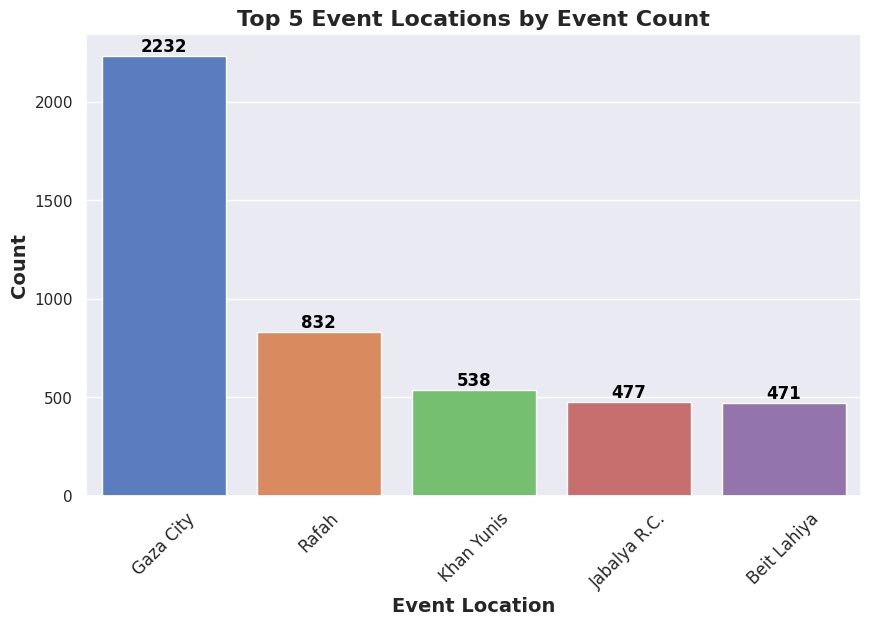

In [17]:
# Top 5 event locations by count
top5_event_locations = war_df['event_location'].value_counts().head(5)

# Define a custom color palette
colors = sns.color_palette("muted")

plt.figure(figsize=(10, 6))  # Adjusted figure size to accommodate long x-axis labels
# Create the bar plot
ax = sns.barplot(x=top5_event_locations.index, y=top5_event_locations.values, palette=colors)

# Add labels to the bars
for i, count in enumerate(top5_event_locations):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Top 5 Event Locations by Event Count', fontsize=16, fontweight='bold')
plt.xlabel('Event Location', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)  # Rotate and adjust x-axis labels

# Customize the plot style
sns.set(style="whitegrid")

plt.show()

**The five most war-active location was in this order from most impact: Gaza City, Rafah, Khan Yunis, Jabalya and Beit Lahiya**

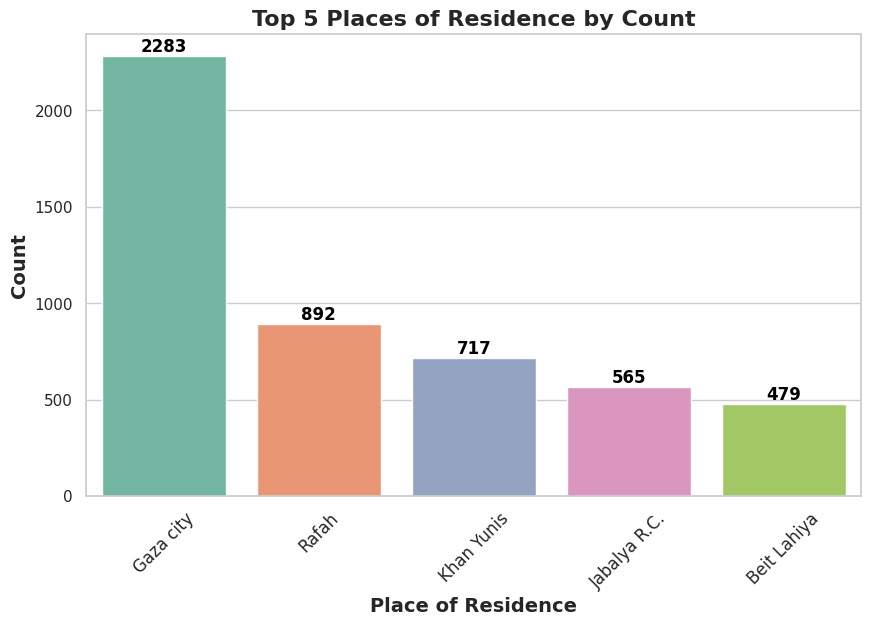

In [18]:
# Top 5 place of residence by count
top5_place_of_residence = war_df['place_of_residence'].value_counts().head(5)

# Define a custom color palette
colors = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))  # Adjusted figure size to accommodate long x-axis labels
# Create the bar plot
ax = sns.barplot(x=top5_place_of_residence.index, y=top5_place_of_residence.values, palette=colors)

# Add data labels to the bars
for i, count in enumerate(top5_place_of_residence):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Top 5 Places of Residence by Count', fontsize=16, fontweight='bold')
plt.xlabel('Place of Residence', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)  # Rotate and adjust x-axis labels

# Customize the plot style
sns.set(style="whitegrid")

plt.show()

**This chart is very much similiar with the previous one, because residences usually stay at the same city**

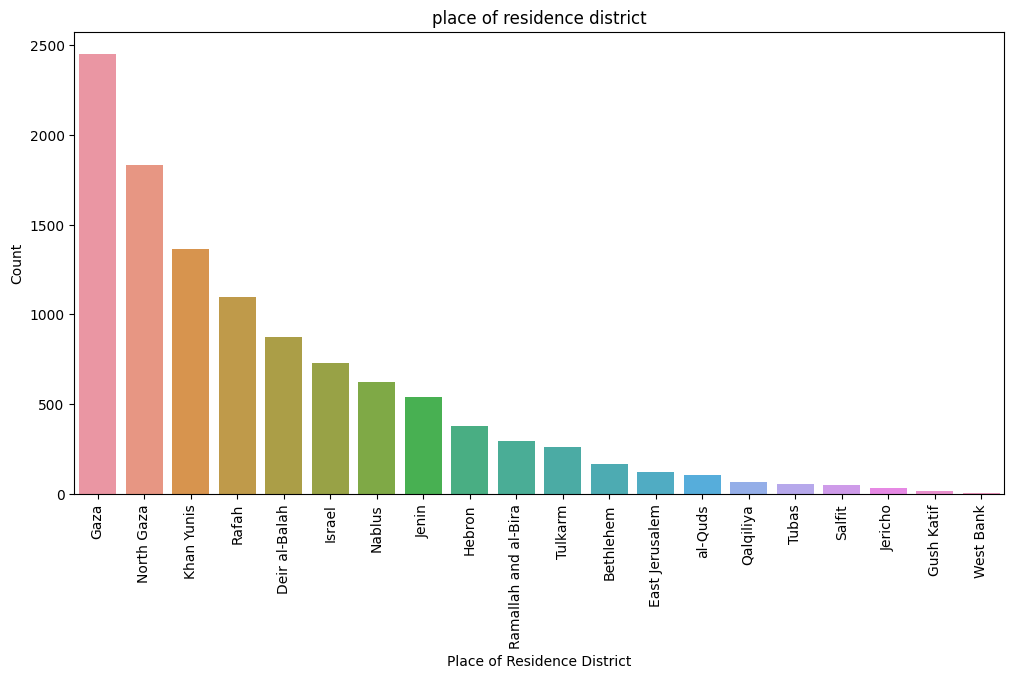

In [37]:
# Places of residence by count
place_of_residence_district = war_df['place_of_residence_district'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=place_of_residence_district.index, y=place_of_residence_district.values)
plt.title('place of residence district')
plt.xlabel('Place of Residence District')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Here is the list of Residence District order by the most densely populated, starting at "Gaza"**

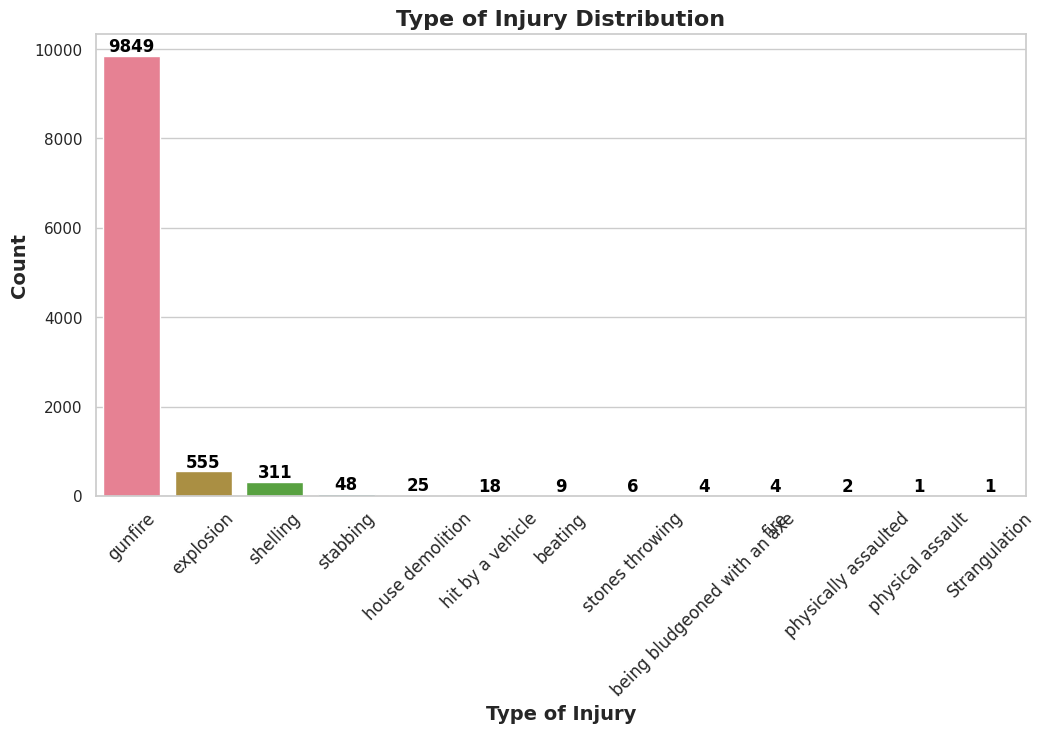

In [20]:
# Bar plot for 'type_of_injury'
type_of_injury_counts = war_df['type_of_injury'].value_counts()

# Define a custom color palette
colors = sns.color_palette("husl")

plt.figure(figsize=(12, 6))  # Adjusted figure size to accommodate long x-axis labels
# Create the bar plot
ax = sns.barplot(x=type_of_injury_counts.index, y=type_of_injury_counts.values, palette=colors)

# Add labels to the bars
for i, count in enumerate(type_of_injury_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Type of Injury Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Type of Injury', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)  # Rotate and adjust x-axis labels

# Customize the plot style
sns.set(style="whitegrid")

plt.show()

**The most common injury was Gunfire, which accounted for more than 90% of all fatalities in this war**

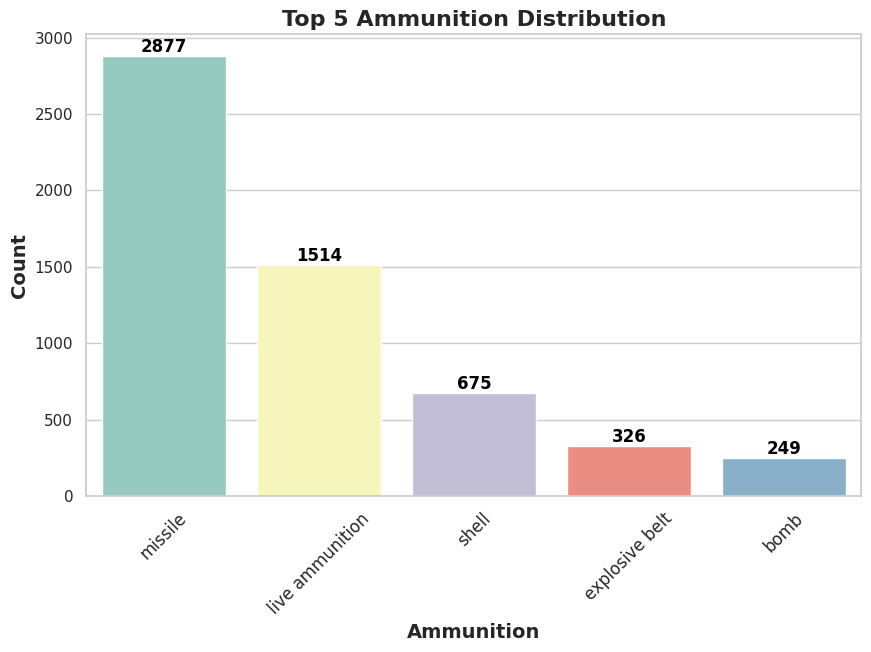

In [19]:
# Injury and Ammuniation
top5_ammunition_counts = war_df['ammunition'].value_counts().head(5)
# Define a custom color palette
colors = sns.color_palette("Set3")

plt.figure(figsize=(10, 6))  # Adjusted figure size to accommodate long x-axis labels
# Create the bar plot
ax = sns.barplot(x=top5_ammunition_counts.index, y=top5_ammunition_counts.values, palette=colors)

# Add labels to the bars
for i, count in enumerate(top5_ammunition_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Top 5 Ammunition Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Ammunition', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)  # Rotate and adjust x-axis labels

# Customize the plot style
sns.set(style="whitegrid")

plt.show()

**Most common ammunition ranking: missle, live ammunition, shell, explosive belt and bomb at the 5th place**

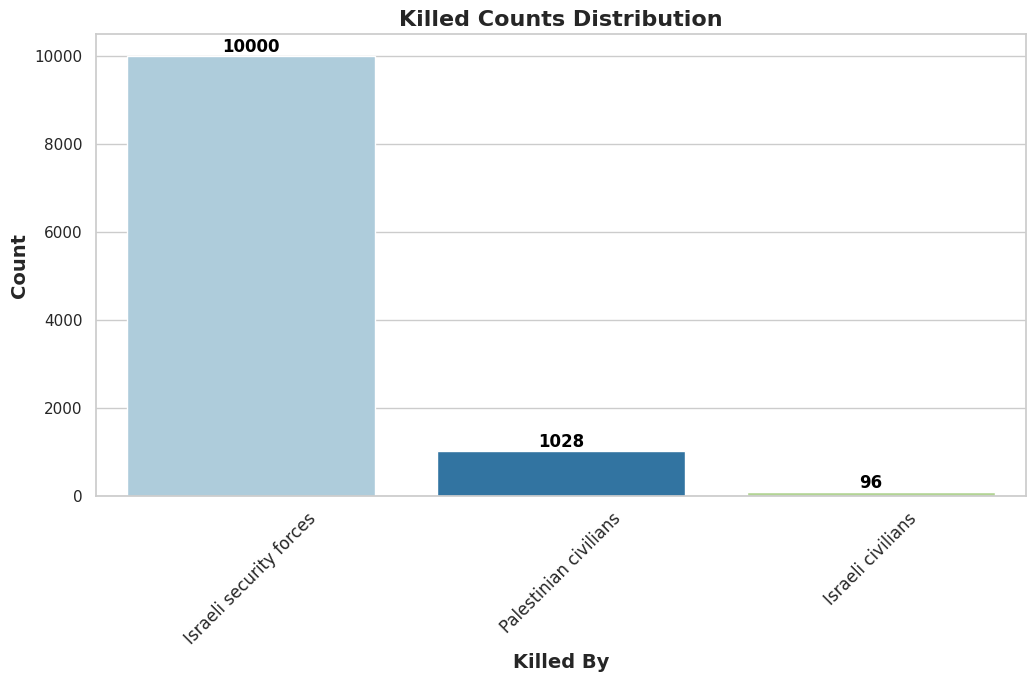

In [21]:
# Killed by which force
killed_by_counts = war_df['killed_by'].value_counts()

# Define a custom color palette
colors = sns.color_palette("Paired")

plt.figure(figsize=(12, 6))  # Adjusted figure size to accommodate long x-axis labels
# Create the bar plot
ax = sns.barplot(x=killed_by_counts.index, y=killed_by_counts.values, palette=colors)

# Add labels to the bars
for i, count in enumerate(killed_by_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Killed Counts Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Killed By', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)  # Rotate and adjust x-axis labels

# Customize the plot style
sns.set(style="whitegrid")

plt.show()

**Most of the fatalities was done by Israeli Security forces**

##**Summary of the EDA**

1. Age Distribution: The age of individuals in the dataset varies widely, with a mean age of approximately 26.44 years. The majority of individuals fall in the 19-31 age range.

2. Gender Distribution: The dataset is skewed toward males, with a higher number of male casualties compared to females. What factors might contribute to this gender disparity?

3. Citizenship Distribution: Palestinian citizens outnumber Israeli citizens in the dataset, indicating a higher number of Palestinian casualties. What geopolitical factors might explain this disparity?

4. Hostilities Involvement: Over 4000 individuals were not involved in hostilities, while more than 3000 but less than 4000 were involved. Approximately 1000 casualties were Israeli, and nearly 200 were targeted killings. Another 2000 are unidentified. What implications does this distribution have for understanding the conflict?

5. Time Series Analysis: Event counts were notably high in 2008-2009 and again in 2015-2016. What historical events or conflicts might have contributed to these spikes?

6. Events by Israeli Security Forces: The number of events involving Israeli security forces appears to increase in 2008-2009 and again in 2015. What actions or operations might explain these patterns?

7. Ammunition Distribution: The majority of events involve unidentified weapons, followed by Qassam rockets and bombs. In 2015, Grad rockets and missiles were also used. What impact do changes in weaponry have on the conflict?

8. Geopolitical Analysis: The top 5 event locations are Gaza City, Rafah, Khan Yunis, Jabalya RC, and Beit Lahiya, with Gaza City having the highest count. What significance do these locations have in the context of the Israeli-Palestinian conflict?

9. Residence Analysis: The distribution of place of residence mirrors the event locations, with Gaza City being prominent. What role might these residential areas play in the conflict?

10. Killed By Counts: Israeli security forces are responsible for a significant number of casualties, while Palestinian civilians are responsible for fewer casualties. What does this distribution reveal about the conflict dynamics?